In [1]:
import re
import pandas as pd
from ssvep_analyzer import SsvepAnalyzer

In [2]:
file_path = '../Data/2023-11-13/Tim_Deuteranomaly_0.0_mixed-deuteranomaly-series_frequency_7.5_tile-size120_7cc70eb8-759c-4731-bc8e-3b81249274ff.csv'
df = pd.read_csv(file_path, skiprows=10, header=None)

with open(file_path, 'r') as file:
    content = file.read()
    
match = re.search(r'Frequency:\s*(\d+(\.\d+)?)', content)
stimulus_frequency = float(match.group(1)) if match else None

eeg_data = df.to_numpy()[:, 1:9].astype(float)
marker = df.to_numpy()[:, -1].flatten()

analyzer = SsvepAnalyzer(sampling_rate=250, stimulus_frequency=stimulus_frequency)

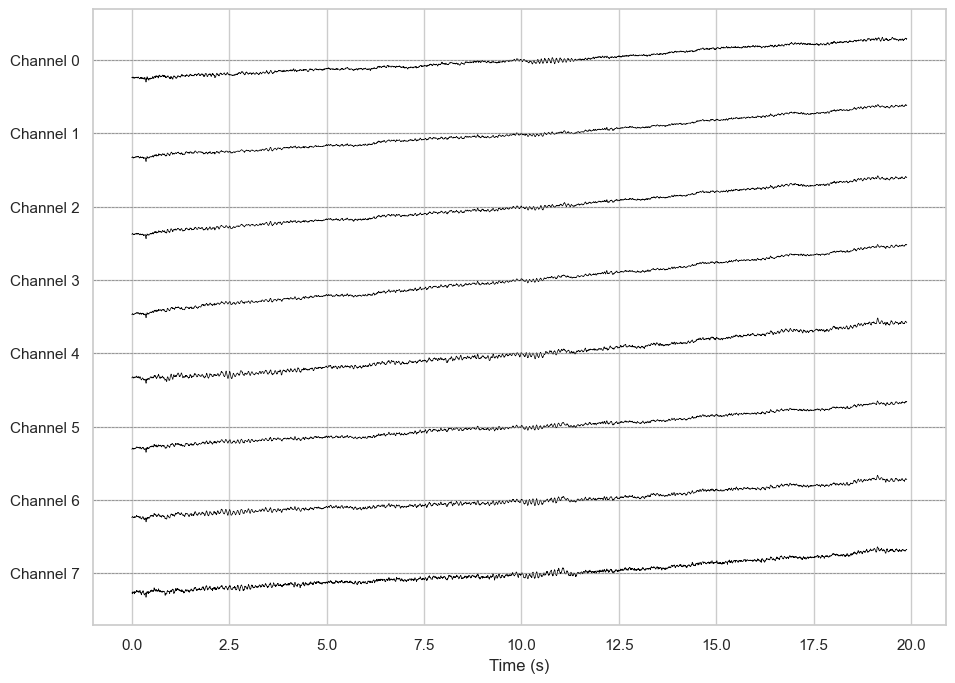

In [3]:
analyzer.plot_eeg(eeg_data);

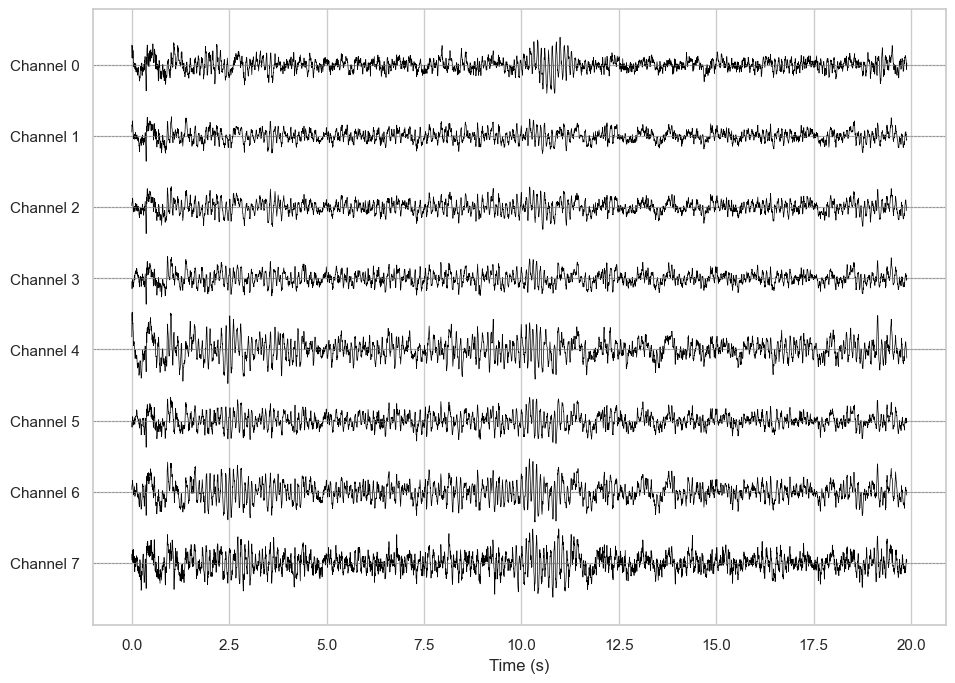

In [4]:
processed_eeg_data = analyzer.apply_linear_detrending(eeg_data)
processed_eeg_data = analyzer.apply_lowpass_filter(processed_eeg_data)
processed_eeg_data = analyzer.apply_highpass_filter(processed_eeg_data)
processed_eeg_data = analyzer.apply_notch_filter(processed_eeg_data)

analyzer.plot_eeg(processed_eeg_data);

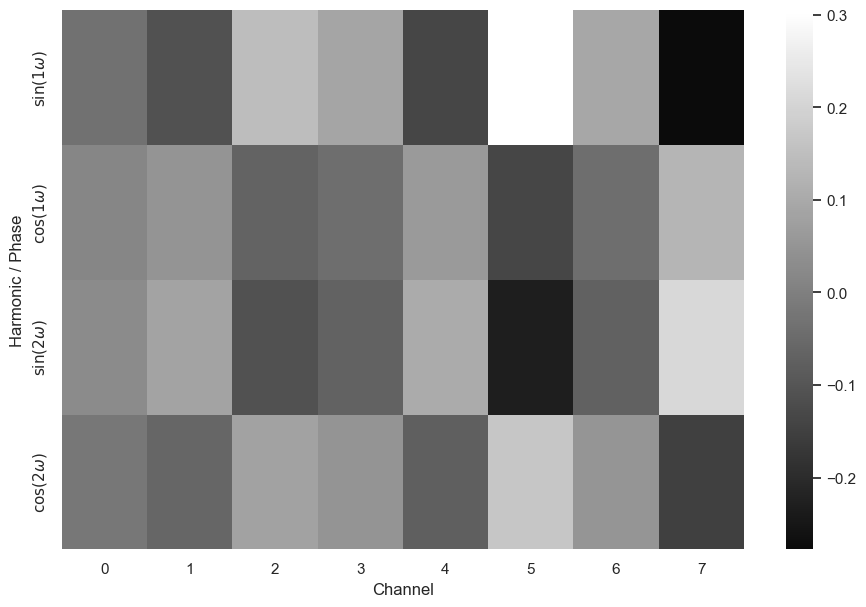

In [5]:
reduced_eeg_data, coefficient_matrix = analyzer.compute_reduced_signal(processed_eeg_data)
analyzer.plot_coefficient_matrix(coefficient_matrix);

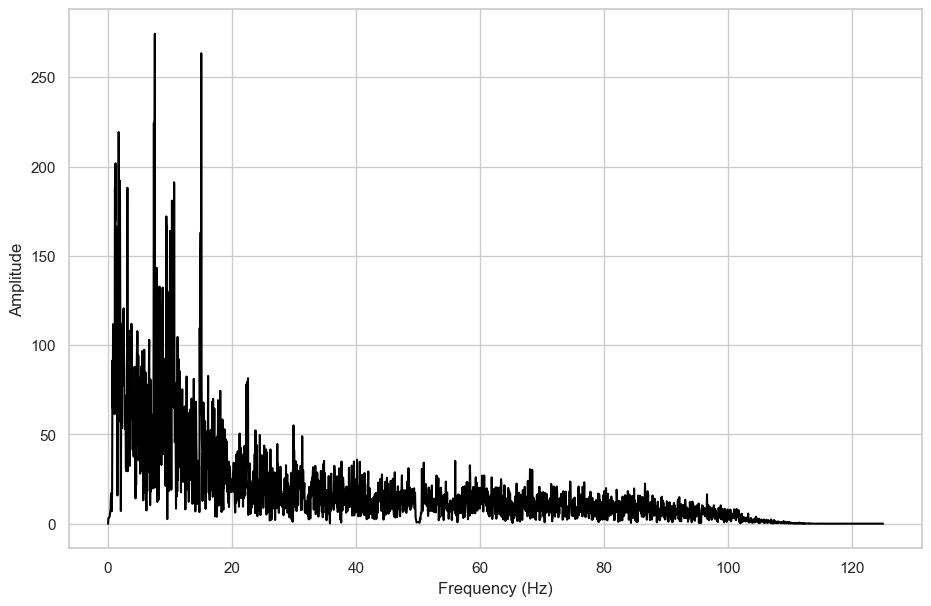

In [6]:
frequencies, spectrum = analyzer.compute_power_spectrum(reduced_eeg_data)
analyzer.plot_power_spectrum(frequencies, spectrum);

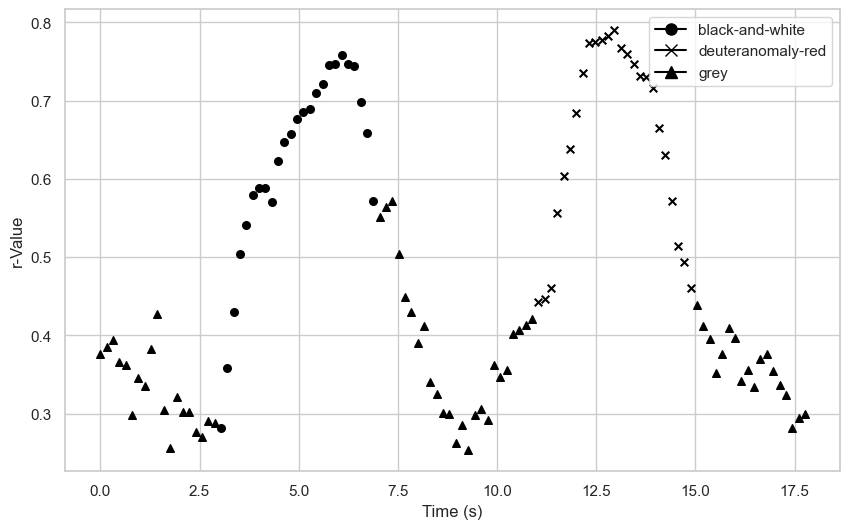

In [7]:
r_values, times, marker_values = analyzer.compute_running_r_values(processed_eeg_data, marker)
analyzer.plot_r_values(r_values, times, marker_values);

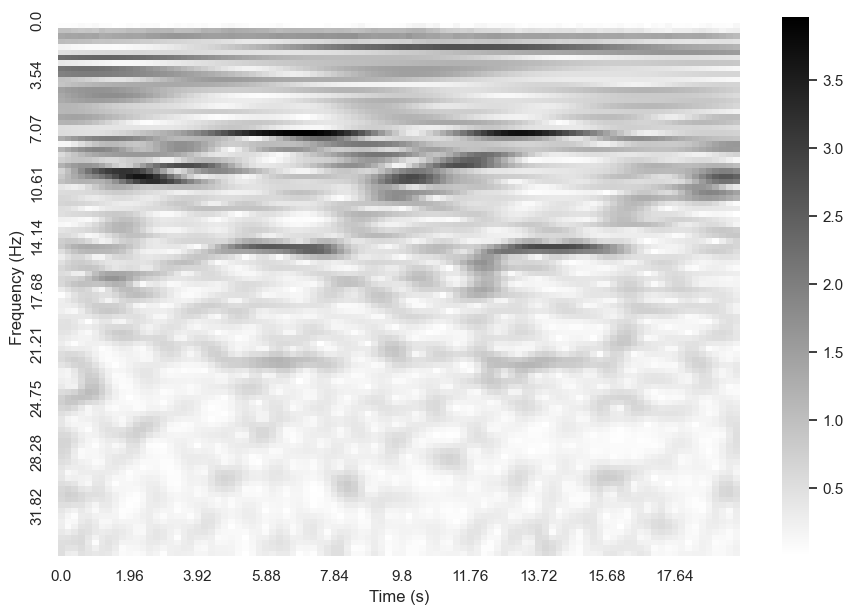

In [8]:
frequencies, times, cwt_matrix = analyzer.compute_wavelet_transform(reduced_eeg_data, n_frequencies=100, n_times=100)
analyzer.plot_wavelet_transform(frequencies, times, cwt_matrix);